# 数据探索

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sb

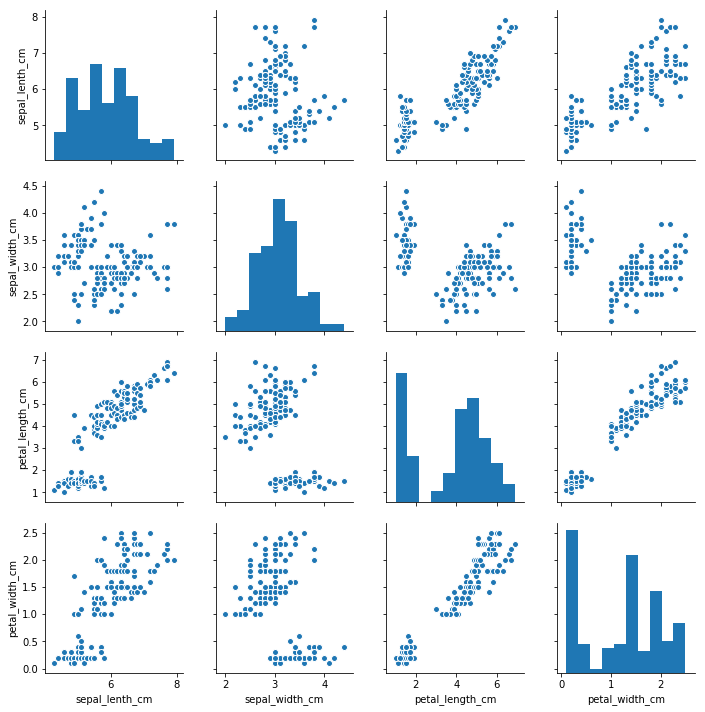

In [2]:
df = pd.read_csv('Iris_clean.csv')
sb.pairplot(df)

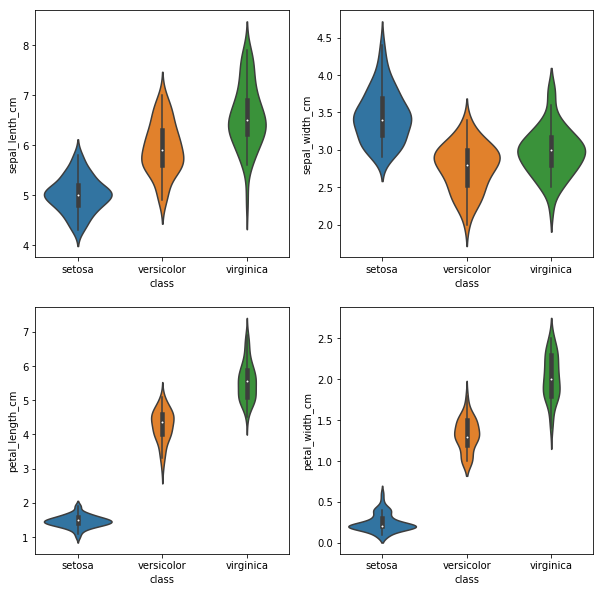

In [3]:
plt.figure(figsize=(10,10))

for column_index, column in enumerate(df.columns):
    if column == 'class':
        continue
    #按照索引分成四个小图
    plt.subplot(2, 2, column_index+1)
    #在每个小图上画出特征
    sb.violinplot(x='class', y=column, data=df)

### 测试训练集

In [4]:
df = pd.read_csv('Iris_clean.csv')
#scikit-learn 需要输入的是numpy的array 
training_set = df[['sepal_lenth_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values
print(training_set[:5])
training_class = df['class'].values
print(training_class[:5])

[[ 4.3  3.   1.1  0.1]
 [ 4.4  2.9  1.4  0.2]
 [ 4.4  3.   1.3  0.2]
 [ 4.4  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


In [5]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
#忽略这些warning才可以进行训练

In [6]:
(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(training_set, training_class, train_size=0.75, random_state=1)

In [13]:
from sklearn.tree import DecisionTreeClassifier

#创分类器对象 
tree_classfier = DecisionTreeClassifier()

#Build a decision tree classifier from the training set (X, y).
tree_classfier.fit(training_inputs, training_classes) 
#Returns the mean accuracy on the given test data and labels.
tree_classfier.score(testing_inputs, testing_classes)

0.97368421052631582

## 97%的正确率  还不错

In [24]:
tree_classfier.predict(testing_inputs[1:5])

array(['versicolor', 'versicolor', 'virginica', 'versicolor'], dtype=object)

### 源数据中一部分做training 一部分做test

In [28]:
print(training_inputs)

[[ 4.9  3.1  1.5  0.2]
 [ 6.3  2.9  5.6  1.8]
 [ 7.6  3.   6.6  2.1]
 [ 5.7  2.8  4.1  1.3]
 [ 6.   2.2  4.   1. ]
 [ 4.9  3.6  1.4  0.1]
 [ 4.6  3.1  1.5  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 5.5  2.4  3.8  1.1]
 [ 5.4  3.9  1.7  0.4]
 [ 5.2  3.4  1.4  0.2]
 [ 6.3  3.4  5.6  2.4]
 [ 7.2  3.6  6.1  2.5]
 [ 6.4  2.7  5.3  1.9]
 [ 6.5  3.   5.5  1.8]
 [ 6.3  3.3  4.7  1.6]
 [ 5.6  2.8  4.9  2. ]
 [ 6.4  2.8  5.6  2.2]
 [ 6.7  3.   5.   1.7]
 [ 4.8  3.   1.4  0.1]
 [ 6.7  3.   5.2  2.3]
 [ 6.7  3.1  4.7  1.5]
 [ 4.8  3.4  1.9  0.2]
 [ 4.4  3.   1.3  0.2]
 [ 6.9  3.1  4.9  1.5]
 [ 6.3  3.3  6.   2.5]
 [ 5.8  2.8  5.1  2.4]
 [ 4.6  3.6  1.   0.2]
 [ 6.5  3.   5.2  2. ]
 [ 6.1  2.6  5.6  1.4]
 [ 5.7  2.8  4.5  1.3]
 [ 5.5  2.3  4.   1.3]
 [ 6.   3.4  4.5  1.6]
 [ 6.5  3.2  5.1  2. ]
 [ 5.7  4.4  1.5  0.4]
 [ 5.6  2.5  3.9  1.1]
 [ 5.9  3.2  4.8  1.8]
 [ 6.4  2.8  5.6  2.1]
 [ 6.6  3.   4.4  1.4]
 [ 4.9  2.5  4.5  1.7]
 [ 6.4  3.1  5.5  1.8]
 [ 4.8  3.4  1.6  0.2]
 [ 5.1  3.8  1.6  0.2]
 [ 5.1  3.4

In [29]:
print(testing_inputs)

[[ 7.7  2.6  6.9  2.3]
 [ 6.4  2.9  4.3  1.3]
 [ 5.4  3.   4.5  1.5]
 [ 6.   2.7  5.1  1.5]
 [ 6.2  2.9  4.3  1.3]
 [ 5.9  3.   5.1  1.8]
 [ 6.6  2.9  4.6  1.3]
 [ 5.2  2.7  3.9  1.4]
 [ 5.5  4.2  1.4  0.2]
 [ 5.5  2.6  4.4  1.2]
 [ 4.6  3.4  1.4  0.3]
 [ 4.9  3.1  1.5  0.1]
 [ 6.7  3.1  4.4  1.4]
 [ 4.8  3.   1.4  0.3]
 [ 5.5  2.5  4.   1.3]
 [ 5.1  3.8  1.9  0.4]
 [ 5.9  3.   4.2  1.5]
 [ 5.1  3.8  1.5  0.3]
 [ 5.7  2.6  3.5  1. ]
 [ 5.2  3.5  1.5  0.2]
 [ 6.4  3.2  5.3  2.3]
 [ 7.7  3.8  6.7  2.2]
 [ 5.1  3.3  1.7  0.5]
 [ 6.7  3.3  5.7  2.5]
 [ 6.2  3.4  5.4  2.3]
 [ 5.   3.6  1.4  0.2]
 [ 5.   2.3  3.3  1. ]
 [ 5.8  4.   1.2  0.2]
 [ 6.5  2.8  4.6  1.5]
 [ 5.8  2.7  5.1  1.9]
 [ 6.7  2.5  5.8  1.8]
 [ 7.   3.2  4.7  1.4]
 [ 5.4  3.4  1.7  0.2]
 [ 6.9  3.1  5.1  2.3]
 [ 5.1  3.5  1.4  0.3]
 [ 5.4  3.7  1.5  0.2]
 [ 6.   3.   4.8  1.8]
 [ 6.3  2.5  5.   1.9]]


In [30]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(training_set, training_class, train_size=0.75)
    
    tree_classfier = DecisionTreeClassifier()
    tree_classfier.fit(training_inputs, training_classes) 
    accuracy = tree_classfier.score(testing_inputs, testing_classes)
    model_accuracies.append(accuracy)

(array([   2.,    6.,   23.,    0.,   86.,  219.,    0.,  330.,  244.,   90.]),
 array([ 0.81578947,  0.83421053,  0.85263158,  0.87105263,  0.88947368,
         0.90789474,  0.92631579,  0.94473684,  0.96315789,  0.98157895,  1.        ]),
 <a list of 10 Patch objects>)

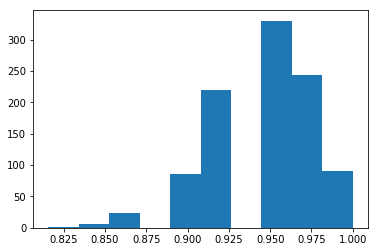

In [31]:
plt.hist(model_accuracies)

### 数据测试集不同，存在过拟合（overfitting） 训练模型训练得过好，泛化不行
使用逻辑斯特线性回归

In [36]:
from sklearn.linear_model import LogisticRegression

#创分类器对象 
Logistic_classfier = LogisticRegression()

#Build a decision tree classifier from the training set (X, y).
Logistic_classfier.fit(training_inputs, training_classes) 
#Returns the mean accuracy on the given test data and labels.
Logistic_classfier.score(testing_inputs, testing_classes)

0.94736842105263153

In [37]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(training_set, training_class, train_size=0.75)
    
    Logistic_classfier = LogisticRegression()
    Logistic_classfier.fit(training_inputs, training_classes) 
    accuracy = Logistic_classfier.score(testing_inputs, testing_classes)
    model_accuracies.append(accuracy)

(array([   1.,    2.,    4.,    7.,   33.,  109.,  196.,  253.,  281.,  114.]),
 array([ 0.76315789,  0.78684211,  0.81052632,  0.83421053,  0.85789474,
         0.88157895,  0.90526316,  0.92894737,  0.95263158,  0.97631579,  1.        ]),
 <a list of 10 Patch objects>)

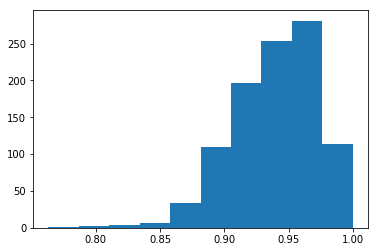

In [38]:
plt.hist(model_accuracies)

# Cross-validation

In [39]:
import numpy as np
from sklearn.model_selection import cross_val_score 

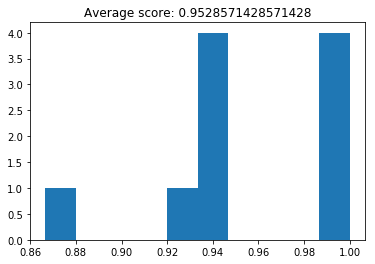

In [47]:
tree_classfier = DecisionTreeClassifier()

cv_scores = cross_val_score(tree_classfier, training_set, training_class, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

### 多模型

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [66]:
random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators':[5, 10, 25, 50],
                 'criterion':['gini', 'entropy'],
                 'max_features':[1,2,3,4],
                 'warm_start':[True, False]}

cross_validation = StratifiedKFold(n_splits=10, random_state=2017)

grid_search = GridSearchCV(random_forest_classifier,
                          param_grid=parameter_grid,
                          cv=cross_validation)

grid_search.fit(training_set, training_class)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.959731543624161
Best parameters: {'criterion': 'gini', 'max_features': 4, 'n_estimators': 5, 'warm_start': False}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)